**Laboratorio di Intelligenza artificiale**

Vincenzo Bonnici\
Corso di Laurea Magistrale in Scienze Informatiche\
Dipartimento di Scienze Matematiche, Fisiche e Informatiche\
Università degli Studi di Parma\
2022-2023

---


# **Strumenti di sviluppo e analisi**
***
## Moduli e pacchetti

In python un modulo è un qualsiasi file con estensione `.py` che può essere raggiunto dall’ambiente in esecuzione.

Ovviamente, vi è una forte analogia con i package di Java o con le librerie di C++, tuttavia l’organizzazione di moduli e sotto-moduli è gestita in modo diverso.

Se vogliamo strutturare le funzionalità del nostro software in
moduli e sotto-moduli, allora dobbiamo creare una gerarchia di cartelle e collocare dentro di esse specifici file (`__init.py__`) dentro esse.
In questo caso, la cartella prende il nome di package.
![example package](2-imgs/pyl1.png)


Noi ci occuperemo solo dei moduli, senza addentrarci in come si struttura in software o una API complessa in python.

Un modulo è quindi un qualsiasi file `nomemodulo.py` della cartella corrente e possiamo richiamarlo con `[ from ] import`.

In [102]:
import modulo
modulo.somma(1,2)

3

In [103]:
from modulo import *
somma(1,2)

3

In [104]:
from modulo import somma
somma(1,2)

3

---
## Python Standard Library

Come abbiamo già visto nel caso di `itertools`, python ci fornisce delle librerie le cui funzioni non sono buit-in nel linguaggio ma possono essere richiamate importando tali librerie. L'insieme di queste librerie è detto **Python Standard Library**.

Di seguito diamo alcuni esempi di quelle più utili per questo corso.

La lista completa è disponibile all'indirizzo [https://docs.python.org/3/library/](https://docs.python.org/3/library/)


`sys` per la gestione di parametri dell'ambiente corrente. Ad esempio, `sys.argv` ci permette di leggere i parametri da linea di comando quando lanciamo uno script. `sys.argv[0]` è il nome dello script corrente. 
`sys.argv[1]` è il primo parametro passato allo script. `len(sys.argv)` è il numero di parametri.

`getopt` per una gestione più sofisticata dei parametri di uno script.

`os` utile per gestire file, percorsi, processi e tutto quello che riguarda l'interfacciamento con il sistema.

`math` per le funzioni matematiche, come: `floor, ceil, factorial, log, sqrt, cos`, etc...

`statistics` per le funzioni statistiche: `mean,stder`, etc...

---
## Espressioni regolari

Naturalmente, python fornisce un modulo built-in per le espressioni regolari, chiamato `re`.

Una espressione regolare può essere utilizzata in modo diretto, es
```python
import re
re.search('(?<=abc)def', 'abcdef')
```

In [105]:
import re

res = re.search('(?<=abc)def', 'abcdef')
if res:
    print('trovata')
    print(res)
    
print('-'*40)
    
res = re.search('den', 'abcdef')
if res:
    print('trovata')
else:
    print('non trovata')
    print(res)


trovata
<re.Match object; span=(3, 6), match='def'>
----------------------------------------
non trovata
None


Tuttavia, è consigliabile __compilare__ le espressioni per una questione di efficienza: 
```python
pattern = re.compile('(?<=abc)def')
```

Se il nostro scopo è la semplice verifica di una espressione regolare all'interno di una stringa target, allora ```match(regex, target_string)``` ci permette di farlo in modo efficiente e senza scrivere troppo codice:

```python
name = 'ENSG_0000923.13'
if re.match('^ENS[GTP][0-9]+(\.[0-9]+)*$', name):
    print('The name is an Ensembl ID')
else:
    print('The name is not an Ensembl ID')
```

Tra le funzioni principali di un oggetto di espressione regole compilato troviamo:

`.search(target_string[, start, end])` per la ricerca di una regex.

`.findall(target_string[, start, end])` che ci torna sotto forma di lista tutte le occorrenze del pattern.

In [106]:
target_string = """
Emma is a basketball player who was born on June 17, 1993. 
She played 112 matches with scoring average 26.12 points per game. 
Her weight is 51 kg."""
result = re.findall(r"\d+", target_string)

print(result)

['17', '1993', '112', '26', '12', '51']


`.split(target_string)` per tokenizzare una stringa in base ad una espressione regolare da utilizzare come punto per la divisione.

`.sub(replacement, target_string)` per sostituire un determinato pattern.

In generale, gli oggetti ritornati da questi metodi sono dei __match objects__  che ci permette di avere qualche informazione sul matching specifico. Tale oggetto è `None` se la ricerca del pattern non è andata a buon fine

Se invece vogliamo navigare tra le occorrenze del pattern allora possiamo usare `re.finditer` che ci ritorna un oggetto iterabile.

In [107]:
target_string = """
Emma is a basketball player who was born on June 17, 1993. 
She played 112 matches with a scoring average of 26.12 points per game. 
Her weight is 51 kg."""

# finditer() with regex pattern and target string
# \d{2} to match two consecutive digits 
result = re.finditer(r"\d{2}", target_string)

# print all match object
for match_obj in result:
    # print each re.Match object
    print(match_obj)
    
    # extract each matching number
    print(match_obj.group())

<re.Match object; span=(50, 52), match='17'>
17
<re.Match object; span=(54, 56), match='19'>
19
<re.Match object; span=(56, 58), match='93'>
93
<re.Match object; span=(72, 74), match='11'>
11
<re.Match object; span=(110, 112), match='26'>
26
<re.Match object; span=(113, 115), match='12'>
12
<re.Match object; span=(148, 150), match='51'>
51


---
# Librerie per la Data Science

Tra le librearie più importanti per l'analisi dei dati e il loro sfruttamento abbiamo:
* **NumPy**: aggiunge il support per __array__ (multi-dimensionali) e funzioni matematiche per lavorare con tali oggetti. [link](https://numpy.org/)
* **SciPy**: per il __calcolo scientifico__. Contiene moduli per: ottimizzazione, algebra, integrazione, interpolazione, FFT, processamento di segnali, ODE e altri. [link](https://scipy.org/)
* **Pandas**: per la manipolazione e l'analisi di __dati strutturati__. [link](https://pandas.pydata.org/)
* **SciKit-Learn**: framework per il __machine learning__ a scopo educativo. [link](https://scikit-learn.org/stable/)

e per la visuzalizzazione:
* **matplotlib**: basata su NumPy, fornisce delle API per la visualizzazione di grafici all'interno di script python. Il modulo **pyplot** ci permette di avere dei grafici in stile MATLAB. [link](https://matplotlib.org/)
* **Seaborn**: basata su matplotlib ma fornisce delle interfaccie più _attraenti_ e interattive. Simile alla libreria di R **ggplot2**. [link](https://seaborn.pydata.org/)

--- 
## Pandas
Pandas è una libreria per la gestione dei dati e per una analisi dei dati esplirativa.

Non è una libreria della PSL ma si trova in tutti i repository principali di ptyhon.

Per installarla con pip:

```bash
pip install pandas
```

Si ispira ai frame di R ed è pensata per essere utilizzata tramite programmazione funzionale piuttosto che tramite programazione imperativa pura. 

Inoltre, presenta delle funzionalità che sono simili alle funzionalità di SQL.

Le strutture dati principali sono `DataFrame` e `Series`.

`DataFrame` ci permette di strutturare i nostri dati secondo un **frame**, ovvero una tabella a cui vengono aggiunti dei metadati per la gestione degli indici di riga e colonna.

<div><img src="2-imgs/pyl4.webp" style="width: 400px;"/></div> 

---
### Creazione di un dataframe vuoto e popolamento
Possiamo creare un dataframe da zero aggiungendo manuamente una colonna alla volta, stando attenti all'ordine dei dati.

In [108]:
import pandas as pd
df = pd.DataFrame()
print('-'*40)
display(df)
print('-'*40)
print(len(df))

----------------------------------------


""


----------------------------------------
0



Utilizziamo l'operatore di slice per selezionare le colonne o per crearne di nuove.

**Vincoli**: i valori all'interno di una singola colonna devono essere di tipo omogeneo.

In [109]:
nomi = ['Vincenzo', 'Flavio', 'Alessandro']
eta = [38, 41, 45]

df['nomi'] = nomi
df['eta'] = eta

display(df)

print('-'*40)

print(len(df)) # numero di righe del dataframe

,nomi,eta
0,Vincenzo,38
1,Flavio,41
2,Alessandro,45


----------------------------------------
3



Si può anche utilizzare l'operatore `.`  per richiamare una colonna come se fosse un attibuto della istanza di classe DataFrame, se e solo se la colonna è già presente nel dataframe.


In [110]:
print(df.eta)

0    38
1    41
2    45
Name: eta, dtype: int64



### Caricamento di un dataframe da file

In alternativa possiamo caricare/salvare un datafrma da n file `csv`, `json`, `excel`, `stata`, `hfd5`,`sas`, etc... (non tratteremo i vair modi e paramteri di caricamneto e salvataggio su file).


In [111]:
df = pd.read_csv("Salaries.csv")
display(df)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


### Tipi di dato

I tipi di dati dipsonibili in pandas non sono quelli nativi di python.
Perchè pandas serve a gestire e dialogare con diversi formati e quindi piattaforme molto diverse da python.

I tipi di dato principale sono:
* **object** che corrisponde a **string**
* **int64** che corriponde a **int**
* **float64** che corrisponde a **float**
* **datetime64** che è molto simile a **datetime**

Quando si carica un dataframe da un file, i tipi di dato di ogni colonna vengono interpretati in base al contenuto della colonna.

Come capire il tipo di dato di una colonna?


In [112]:
print(df['rank'].dtype)
print(df['salary'].dtype)
print('-'*40)

df.dtypes

object
int64
----------------------------------------


rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object


Tuttavia è possibile forzare il tipo di dato, stando attenti che l'interno contenuto della colonna sia compatibile con il nuovo tipo di dato.

Ricordiamoci che, in pieno stile python, molte funzioni creano delle copie della strtuttura dati (o della fatte di struttura dati) su cui le lanciamo.


In [113]:
df['salary_str'] = df['salary'].astype(str)
print(df['salary'].dtype)
print(df['salary_str'].dtype)

int64
object


### Attributi di un DataFrame 

Ecco aluni attributi principali di un dataframe.

In [114]:
print('tipi di ogni colonna \n')
print(df.dtypes)

print('-'*40)
print('nomi delle colonne, in ordine da sx a dx \n')
print(df.columns) 

print('-'*40)
print('etichette sulle righe e etichette sulle colonne \n')
# attenzione, le etichette sono n realtà degli indici
print(df.axes) 

print('-'*40)
print('numero di dimensioni \n') 
# ops, lo si può utilizzare per i data warehouse
print(df.ndim) 

print('-'*40)
print('numero di righe per ogni dimensione \n')
print(df.shape) 

print('-'*40)
print('numero di elementi \n')
print(df.size, len(df) ,len(df)*len(df.columns)) 

print('-'*40)
print('converte il dataframe in una struttura dati numpy \n')
print(df.values) 

tipi di ogni colonna 

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
salary_str    object
dtype: object
----------------------------------------
nomi delle colonne, in ordine da sx a dx 

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary', 'salary_str'], dtype='object')
----------------------------------------
etichette sulle righe e etichette sulle colonne 

[RangeIndex(start=0, stop=78, step=1), Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary', 'salary_str'], dtype='object')]
----------------------------------------
numero di dimensioni 

2
----------------------------------------
numero di righe per ogni dimensione 

(78, 7)
----------------------------------------
numero di elementi 

546 78 546
----------------------------------------
converte il dataframe in una struttura dati numpy 

[['Prof' 'B' 56 49 'Male' 186960 '186960']
 ['Prof' 'A' 12 6 'Male' 93000 '93000']
 ['Prof' 

### Metodi di un dataframe

Pandas mette a disposizione dei metodi per analizzare in modo veloce un dataframe per l'analisi esplorativa e quindi per aver ein modo veloce delle statistiche sul dataframe.

In [115]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [116]:
print('valore minimo per ogni colonna')
print(df.min())

print('-'*40)
print('valore massimo per ogni colonna')
print(df.max())

valore minimo per ogni colonna
rank          AssocProf
discipline            A
phd                   1
service               0
sex              Female
salary            57800
salary_str       102000
dtype: object
----------------------------------------
valore massimo per ogni colonna
rank            Prof
discipline         B
phd               56
service           51
sex             Male
salary        186960
salary_str     99418
dtype: object


In [117]:
print('medie, mediane e deviazioni standard')
print("!!! SOLO per colonne di dati numerici !!!")

df.mean()

medie, mediane e deviazioni standard
!!! SOLO per colonne di dati numerici !!!


/tmp/ipykernel_183/2565118952.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


phd           1.970513e+01
service       1.505128e+01
salary        1.080238e+05
salary_str             inf
dtype: float64

In [118]:
df['salary'].median()

104671.0

In [119]:
df.std()

/tmp/ipykernel_183/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


phd           12.498425
service       12.139768
salary     28293.661022
dtype: float64

### Groupby

E' possibile raggrupare i dati con l'operatore `groupby`, molto simile all'omonimo operatore SQL.

L'operatore divie i dati in gruppi in base al criterio specificato, e poi possibile calcolare delle statistiche per ognuno dei gruppi creati.


In [120]:
df_gby_rank = df.groupby(['rank'])
df_gby_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348



Nel caso in cui il criterio di raggruppamento coinvolge più colonne, allora verrà calcolato il prodotto cartesiano delle colonne coinvolte e il raggruppamento verrà fatto secondo il risultato di tale prodotto.


In [121]:
df_gby = df.groupby(['rank', 'discipline'])
df_gby.mean()

phd    service         salary
rank      discipline                                     
AssocProf A           18.800000  15.800000   73959.800000
          B           12.750000   8.500000  102927.750000
AsstProf  A            4.375000   2.125000   74450.000000
          B            5.545455   2.272727   86390.272727
Prof      A           28.086957  20.434783  111935.695652
          B           26.043478  22.391304  135313.913043

In [122]:
df_gby = df.groupby(['rank', 'discipline','sex'])
df_gby.mean()

phd    service         salary
rank      discipline sex                                        
AssocProf A          Female  18.500000  15.500000   72128.500000
                     Male    20.000000  17.000000   81285.000000
          B          Female  13.500000   8.833333   99435.666667
                     Male    10.500000   7.500000  113404.000000
AsstProf  A          Female   4.833333   2.500000   72933.333333
                     Male     3.000000   1.000000   79000.000000
          B          Female   6.600000   2.600000   84189.800000
                     Male     4.666667   2.000000   88224.000000
Prof      A          Female  26.500000  16.125000  109631.875000
                     Male    28.933333  22.733333  113164.400000
          B          Female  21.500000  17.900000  131836.200000
                     Male    29.538462  25.846154  137989.076923


Di defautl, `groupby` ordina i dati in uscita, ma questo può rallentare le operazioni, e', quindi, possibile disattivare l'ordinamento dei dati.


In [123]:
df.groupby(['rank'], sort=False)[['salary']].mean()

,salary
rank,
Prof,123624.804348
AssocProf,91786.230769
AsstProf,81362.789474


### Filtrare e selezionare i dati in un DataFrame

E' possibile selezione una porzione di un dataframe selezionando solo le righe per cui una o più determinate colonne hanne dei valori ben specifici.

Il risultato è una **copia** del dataframe originale. **Tuttavia**, vengono mantenute le etichette originali sulle righe. 
In questo esempio, le righe con etichetta 8 e 9 non hanno passato il filtraggio.

In [124]:
df_sub = df[ df['salary'] > 120000 ]
df_sub.head()

,rank,discipline,phd,service,sex,salary,salary_str
0,Prof,B,56,49,Male,186960,186960
3,Prof,A,40,31,Male,131205,131205
5,Prof,A,20,20,Male,122400,122400
7,Prof,A,18,18,Male,126300,126300
10,Prof,B,39,33,Male,128250,128250


In [125]:
df_sub = df[ df['sex'] == 'Female' ]
df_sub.head()

,rank,discipline,phd,service,sex,salary,salary_str
39,Prof,B,18,18,Female,129000,129000
40,Prof,A,39,36,Female,137000,137000
41,AssocProf,A,13,8,Female,74830,74830
42,AsstProf,B,4,2,Female,80225,80225
43,AsstProf,B,5,0,Female,77000,77000



### L'operatore di slicing

L'operatore di slicing ci permette di selezionare righe e colonne tramite la loro posizione o la loro etichetta, e quindi di estrarre una determinata portzione/slice del dataframe creando sempre una copia.

In base all'argomento dell'operator di slicing, selezioneremo colonne oppure righe.

Se l'agormento è una strnga o una lsita di stringhe, allora l'operazione selezione le colonne.

Se l'argomento è un intervallo di interi (`start:end`) verrano estratte le righe in base alla loro posizione (che non è la loro etichetta).

In [126]:
print('selezioniamo più colonne')
df[['rank','salary']].head()

selezioniamo più colonne


,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800


In [127]:
print('selezioniamo più riche in base alla loro posizione')
df[10:20]

selezioniamo più riche in base alla loro posizione


,rank,discipline,phd,service,sex,salary,salary_str
10,Prof,B,39,33,Male,128250,128250
11,Prof,B,23,23,Male,134778,134778
12,AsstProf,B,1,0,Male,88000,88000
13,Prof,B,35,33,Male,162200,162200
14,Prof,B,25,19,Male,153750,153750
15,Prof,B,17,3,Male,150480,150480
16,AsstProf,B,8,3,Male,75044,75044
17,AsstProf,B,4,0,Male,92000,92000
18,Prof,A,19,7,Male,107300,107300
19,Prof,A,29,27,Male,150500,150500


In [128]:
print('selezioniamo più riche in base alla loro posizione e NON etichetta')
df[ df['salary'] > 120000 ][1:10]

selezioniamo più riche in base alla loro posizione e NON etichetta


,rank,discipline,phd,service,sex,salary,salary_str
3,Prof,A,40,31,Male,131205,131205
5,Prof,A,20,20,Male,122400,122400
7,Prof,A,18,18,Male,126300,126300
10,Prof,B,39,33,Male,128250,128250
11,Prof,B,23,23,Male,134778,134778
13,Prof,B,35,33,Male,162200,162200
14,Prof,B,25,19,Male,153750,153750
15,Prof,B,17,3,Male,150480,150480
19,Prof,A,29,27,Male,150500,150500


 
Per selezionare righe e colonne è necessario combinare più operatori di slicing in sequenza.


In [129]:
df[0:2]['rank']

type(df[0:2]['rank'])

pandas.core.series.Series


**Attenzione** è necessario passare una lista di colone per far si che il risutlato dell'operatore di slicing sia un dataframe.


In [130]:
df[0:2][['rank']]

,rank
0,Prof
1,Prof


 
Applicare operatori di slicing multipli può essre poco efficiente perchè goni operatore produce una copia dei dati filtrari.

Esiste però un modo per selezionare righe e colonne in una sola operazione tramite il metodo `loc`.


In [131]:
df.loc[10:20 , ['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500



Se volgiamo selezionare le colnnein base alla loro posizione, allora utilizziamo il metodo `iloc`.


In [132]:
df.iloc[10:20,[0,1]].head()

,rank,discipline
10,Prof,B
11,Prof,B
12,AsstProf,B
13,Prof,B
14,Prof,B


In [133]:
df.iloc[10:20,0:2].head()

,rank,discipline
10,Prof,B
11,Prof,B
12,AsstProf,B
13,Prof,B
14,Prof,B



Questo operatore si può qundi utilizzare per selezionare un elemento in modo *classico* usando inidici numerici per righe e colonne.

`iloc` non crea copie del dataframe ma è più simile ad una vista parziale su di esso. E', quindi, possibile utilzzare `iloc` per cambiare il contenuto del dataframe.


In [134]:
df.head()

,rank,discipline,phd,service,sex,salary,salary_str
0,Prof,B,56,49,Male,186960,186960
1,Prof,A,12,6,Male,93000,93000
2,Prof,A,23,20,Male,110515,110515
3,Prof,A,40,31,Male,131205,131205
4,Prof,B,20,18,Male,104800,104800


In [135]:
print(df.iloc[0,0])

Prof


In [136]:
df.iloc[0,0] = 'AsstProf'
df.head()

,rank,discipline,phd,service,sex,salary,salary_str
0,AsstProf,B,56,49,Male,186960,186960
1,Prof,A,12,6,Male,93000,93000
2,Prof,A,23,20,Male,110515,110515
3,Prof,A,40,31,Male,131205,131205
4,Prof,B,20,18,Male,104800,104800



### Ordinare i dati di un dataframe


Possiamo ordinare le righe di un dataframe in base al contenuto delle colonne, così come faremmo ad esmepio in excell, quindi, specificando pure più colonne ed un ordine di preferenza tra colonne.



In [137]:
df_sorted = df.sort_values( by ='service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary,salary_str
55,AsstProf,A,2,0,Female,72500,72500
23,AsstProf,A,2,0,Male,85000,85000
43,AsstProf,B,5,0,Female,77000,77000
17,AsstProf,B,4,0,Male,92000,92000
12,AsstProf,B,1,0,Male,88000,88000


In [138]:
df_sorted = df.sort_values( by =['service', 'salary'], 
                           ascending = [True, False])
df_sorted.head(10)

,rank,discipline,phd,service,sex,salary,salary_str
52,Prof,A,12,0,Female,105000,105000
17,AsstProf,B,4,0,Male,92000,92000
12,AsstProf,B,1,0,Male,88000,88000
23,AsstProf,A,2,0,Male,85000,85000
43,AsstProf,B,5,0,Female,77000,77000
55,AsstProf,A,2,0,Female,72500,72500
57,AsstProf,A,3,1,Female,72500,72500
28,AsstProf,B,7,2,Male,91300,91300
42,AsstProf,B,4,2,Female,80225,80225
68,AsstProf,A,4,2,Female,77500,77500



### Gesione dei valori mancanti 

Pandas mette a disposizione varie funzionalità per gestire i valori mancanti o non definiti.



In [139]:
flights = pd.read_csv("flights.csv")
display(flights)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0



Possiamo cercare i valori nulli in una singola colonna o in tutto il dataframe 


In [140]:
print('righe dove la colonna dep_time è null')
flights[ flights['dep_time'].isnull() ]

righe dove la colonna dep_time è null


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN
859,2013,1,2,NaN,NaN,NaN,NaN,AA,N3FBAA,753,LGA,DFW,NaN,1389,NaN,NaN
860,2013,1,2,NaN,NaN,NaN,NaN,UA,NaN,623,EWR,ORD,NaN,719,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159519,2013,9,27,NaN,NaN,NaN,NaN,US,NaN,2164,LGA,BOS,NaN,184,NaN,NaN
159520,2013,9,27,NaN,NaN,NaN,NaN,UA,NaN,269,LGA,ORD,NaN,733,NaN,NaN
159854,2013,9,28,NaN,NaN,NaN,NaN,AA,N320AA,1,JFK,LAX,NaN,2475,NaN,NaN
159855,2013,9,28,NaN,NaN,NaN,NaN,US,NaN,581,EWR,CLT,NaN,529,NaN,NaN


In [141]:
print('righe dove tutte le colonne sono null')
flights[flights.isnull()]

righe dove tutte le colonne sono null


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
flights.isnull()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
160750,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
160751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
160752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
print('righe dove il valore di almeno una colonna è nullo')
flights[flights.isnull().any(axis=1)].head()

righe dove il valore di almeno una colonna è nullo


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN



`any` ritorna `False` a meno che non esiste un elmento di valore `True` (o equivalente) sull'asse (dimensione) selezionato.

Il primo asse ,di inidce 0, sono le righe. Il secondo asse, di indice 1, sono le colonne.

L'elemento `null` di pandas non cirrisponde a `None` quindi ci servono dei metodi specifici per capire se un valore è nullo oppure no. questi metodi sono `isnull()`  e `notnull()`.

Pandas mette a dispozine dei metodi per cancellare le righe in cui compaiono uno o più valori nulli o per sostituire i valori nulli con un valore specifico.

* `dropna()` elimina le righe per cui almeno un valore è nullo
* `dropna(how='all')` elimina le righe in cui tutti i valori sono nulli
* `dropna(axis=1, how='all')` elimina le colonne cui tutti i valori sono nulli
* `dropna(thresh=5)` elimina le righe con contengono più di 4 valori nulli

* `fillna(0)` sostiuisci i valori nulli con un valore specifico


Diverse colonne possono avere diversi tipi, quindi `fillna(0)` potrebbe non essere la soluzone milgiore.
Sarà necessario specificare un `fillna` per colonnna.


In [144]:
flights[ flights['tailnum'].isnull() ].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN
860,2013,1,2,NaN,NaN,NaN,NaN,UA,NaN,623,EWR,ORD,NaN,719,NaN,NaN
1281,2013,1,3,NaN,NaN,NaN,NaN,UA,NaN,714,EWR,MIA,NaN,1085,NaN,NaN
1282,2013,1,3,NaN,NaN,NaN,NaN,UA,NaN,719,EWR,DFW,NaN,1372,NaN,NaN
3283,2013,1,8,NaN,NaN,NaN,NaN,US,NaN,123,EWR,CLT,NaN,529,NaN,NaN


In [145]:
flights['tailnum'] = flights['tailnum'].fillna('NESSUNO')

flights[ flights['tailnum'] == 'NESSUNO' ].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NESSUNO,133,JFK,LAX,NaN,2475,NaN,NaN
860,2013,1,2,NaN,NaN,NaN,NaN,UA,NESSUNO,623,EWR,ORD,NaN,719,NaN,NaN
1281,2013,1,3,NaN,NaN,NaN,NaN,UA,NESSUNO,714,EWR,MIA,NaN,1085,NaN,NaN
1282,2013,1,3,NaN,NaN,NaN,NaN,UA,NESSUNO,719,EWR,DFW,NaN,1372,NaN,NaN
3283,2013,1,8,NaN,NaN,NaN,NaN,US,NESSUNO,123,EWR,CLT,NaN,529,NaN,NaN


### Sovrascrittura mutlipla dei valori delle celle

L'operatore di slicing può essere utilizzato per cambiare il valore delle celle.
In questo caso lo slicing non produce una copia ma altera il contenuto del dataframe.


In [146]:
set(flights['month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [147]:
flights[ flights['month']==1 ] = 0
set(flights['month'])

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


Possiamo anche creare una nuova colonna il cui valore è una combinazione di due o più colonne del dataframe o il valore di una singola colonna a cui applichiamo una funzione.


In [148]:
flights['n2'] = flights['distance'] + (2 * flights['month'])
flights['n2']

0            0
1            0
2            0
3            0
4            0
          ... 
160749    1418
160750    2493
160751    2493
160752     218
160753    2583
Name: n2, Length: 160754, dtype: int64


Tuttavia, spesso non possiamo applicare funzioni matematiche o operazioni complesse. Per quasto ci viene in aiuto la funzione `apply` che serve appunto ad applicare una funzione su uno specifico asse di un dataframe.


In [149]:
import numpy as np

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
print(df)
print('-'*40)
df = df.apply(np.sqrt)
print(df)

   A  B
0  4  9
1  4  9
2  4  9
----------------------------------------
     A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0



### Unire dataframe

Se due adatframe hanno le stesse colonne, allora possiamo concatenare uno dei due datafram all'altro.

Dobbiamo però stare **attenti** alle etichette sulle righe, che potrebbero non essere più univoche.


In [150]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])

In [151]:
display(df1)

,A,B
x,1,2
y,3,4


In [152]:
display(df2)

,A,B
x,5,6
y,7,8


In [153]:
df3 = pd.concat( [df1,df2] )
display(df3)

,A,B
x,1,2
y,3,4
x,5,6
y,7,8


In [154]:
df3 = pd.concat( [df1,df2], ignore_index=True )
display(df3)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8



Oppure possiamo resettare gli indici.



In [155]:
df3 = pd.concat( [df1,df2] )
df3.reset_index(inplace = True)
display(df3)

,index,A,B
0,x,1,2
1,y,3,4
2,x,5,6
3,y,7,8



Inoltre, pandas mette a disposizione delle operazioni di join in stile SQL.

Ricordiamo:
![join](2-imgs/pyl5.png)

In [156]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [157]:
display(df1)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [158]:
display(df2)

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [159]:
df3 = df1.merge(df2, left_on='lkey', right_on='rkey')
display(df3)

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7



**Attenzione**
* l'ordine è importante
* di default viene utlizzato inner


In [160]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})


print(df1)
print('-'*40)
print(df2)
print('#'*40)

df3 = df1.merge(df2, on='a')
print(df3)
print('-'*40)

df3 = df1.merge(df2, how='inner', on='a')
print(df3)
print('-'*40)

df3 = df1.merge(df2, how='outer', on='a')
print(df3)
print('-'*40)

     a  b
0  foo  1
1  bar  2
----------------------------------------
     a  c
0  foo  3
1  baz  4
########################################
     a  b  c
0  foo  1  3
----------------------------------------
     a  b  c
0  foo  1  3
----------------------------------------
     a    b    c
0  foo  1.0  3.0
1  bar  2.0  NaN
2  baz  NaN  4.0
----------------------------------------


---

# Elementi grafici

Pandas mette a disposizine alcuni elementi grafici perl'analisi esplorativa, attraverso matplotlib e Seaborn.

La documentazione riguardante i plot è displnibile alla pagina ufficiale di Pandas [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

In alcuni casi, con vecchie verisoni di notebook, può essre utile attivare la  direttiva %matplotlib inline



---

## matplotlib

Vivamente consigliato consultare i cheatsheet [link](https://matplotlib.org/cheatsheets/).

Come si compone un **plot** (`figure`):


<div><img src="2-imgs/pyl2.png" style="width: 400px;"/></div> 


<div><img src="2-imgs/pyl2-1.png" style="width: 400px;"/></div> 

---

Anatomia di un **subplot**:
<div><img src="2-imgs/pyl3.webp" style="width: 400px;"/></div> 


### Assi e subplot
Un plot può essere diviso in diversi sotto-plot seguendo una divesione per righe e colonne. Vengono così creati degli **assi**. Ogni asse corrisponde ad una specifica combinazione ri indice di righa e di colonna.

Text(0.5, 1.0, 'axis 1,1')

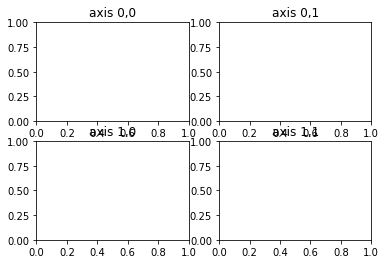

In [2]:
import matplotlib.pyplot as plt

fig1, fig1_axes = plt.subplots(ncols=2, nrows=2)
fig1_axes[0,0].set_title("axis 0,0")
fig1_axes[0,1].set_title("axis 0,1")
fig1_axes[1,0].set_title("axis 1,0")
fig1_axes[1,1].set_title("axis 1,1")


In [3]:
?fig1_axes

Type:        ndarray
String form:
[[<AxesSubplot:title={'center':'axis 0,0'}>
  <AxesSubplot:title={'center':'axis 0,1'}>]
 [<AxesSubplot:title={'center':'axis 1,0'}>
  <AxesSubplot:title={'center':'axis 1,1'}>]]
Length:      2
File:        /usr/local/lib/python3.10/dist-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an arra

### Asso piglia tutto: tight_layout

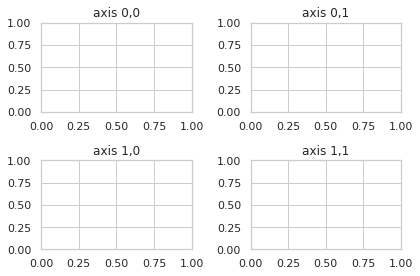

In [162]:
import matplotlib.pyplot as plt

fig1, fig1_axes = plt.subplots(ncols=2, nrows=2)
fig1_axes[0,0].set_title("axis 0,0")
fig1_axes[0,1].set_title("axis 0,1")
fig1_axes[1,0].set_title("axis 1,0")
fig1_axes[1,1].set_title("axis 1,1")

fig1.tight_layout()

### Griglie
Usandi subplots abbimao vari vincoli. Ad esempio, ogni riga deve avere lo stesso numero di colonne, oppure tutti i subplot della stecca colonna devono are la stessa larghezza.

Possiamo liberarci di questi vincoli usando **gridspec**. Questo gestore di layout ci permette anche di avere un numero variabile di subpot sulla stessa riga o colonna, ovvero di avere elementi con **span** diverso.

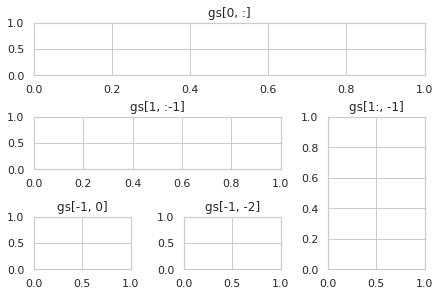

In [163]:
fig3 = plt.figure(constrained_layout=True)

gs = fig3.add_gridspec(3, 3) # Numero originale di righe e colonne

f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])

f3_ax5.set_title('gs[-1, -2]');

---

## Istogrammi

In [164]:
flights = pd.read_csv("flights.csv")
display(flights)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0


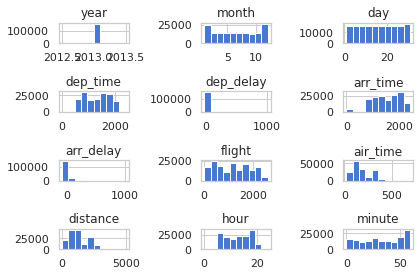

In [165]:
flights.hist()
plt.tight_layout()

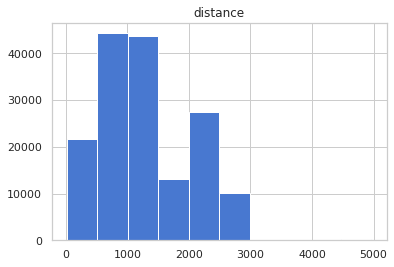

In [166]:
flights.hist(column='distance');


Attenzione a come vengono raggrupati i valori nelle varie barre.


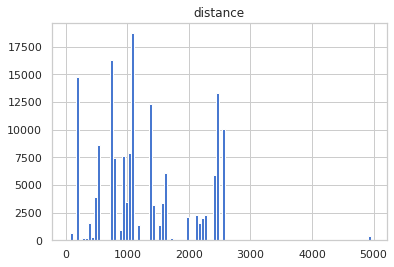

In [167]:
flights.hist(column='distance', bins=100);


Con seaborn è possibile importare dati da un dataframe e, in questo caso, combinare l'istogramma con un **density plot**.


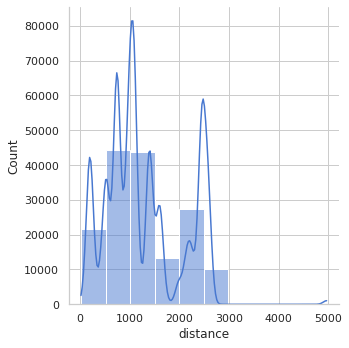

In [168]:
import seaborn as sns

sns.displot(flights.distance, bins=10, kde=True);


**Attenzione** ai density plot, spesso ingannano.


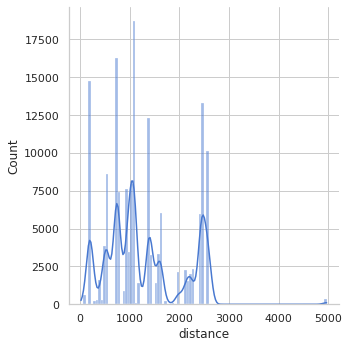

In [169]:
sns.displot(flights.distance, bins=100, kde=True);

---
## Grafici a barre 


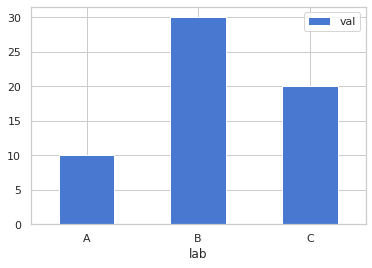

In [170]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [171]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

display(df)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


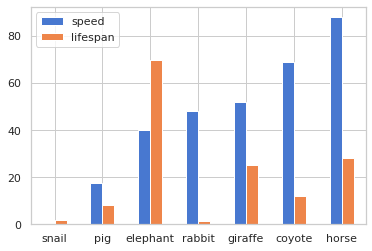

In [172]:
ax = df.plot.bar(rot=0)

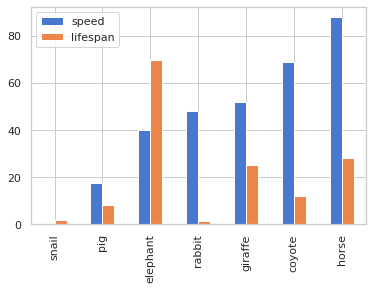

In [173]:
ax = df.plot.bar() #rot serve a ruotare le label sull'asse x

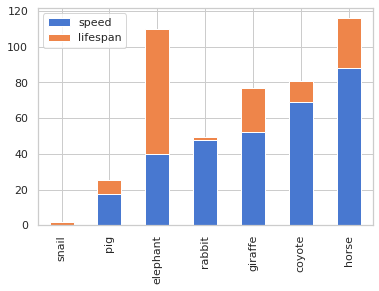

In [174]:
df.plot.bar(stacked=True);

In [175]:
print(df.index)
df['animal'] = df.index
df.index = range(len(df))
display(df)

Index(['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse'], dtype='object')


,speed,lifespan,animal
0,0.1,2.0,snail
1,17.5,8.0,pig
2,40.0,70.0,elephant
3,48.0,1.5,rabbit
4,52.0,25.0,giraffe
5,69.0,12.0,coyote
6,88.0,28.0,horse


<AxesSubplot:xlabel='animal'>

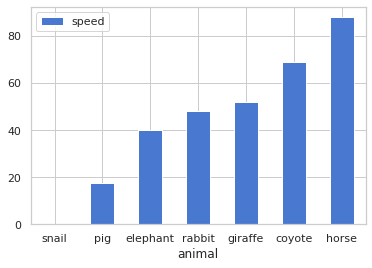

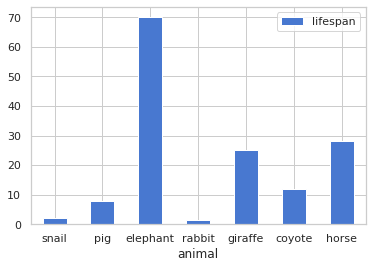

In [176]:
df.plot.bar(x='animal', y='speed', rot=0)
df.plot.bar(x='animal', y='lifespan', rot=0)

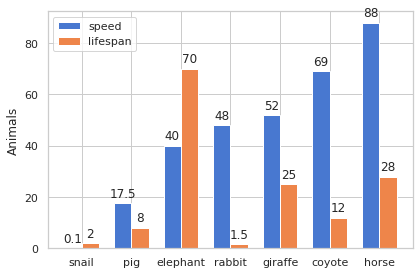

In [177]:
import numpy as np

xlabels = df.animal

x = np.arange(len(xlabels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df.speed, width, label='speed')
rects2 = ax.bar(x + width/2, df.lifespan, width, label='lifespan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Animals')
ax.set_xticks(x, xlabels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [202]:
?ax.bar

Signature:
ax.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars w


## Scatter plot

In generale richiedono che le due misure graficate siano entrambe dei valori numerici.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


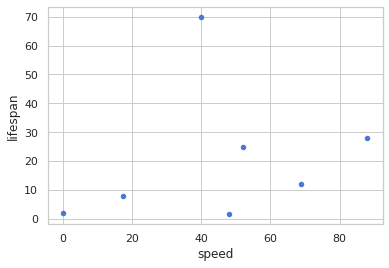

In [178]:
df.plot.scatter(x='speed', y='lifespan');

<AxesSubplot:xlabel='speed', ylabel='lifespan'>

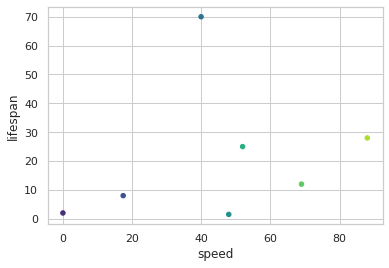

In [179]:
color_labels = df['animal'].unique()
rgb_values = sns.color_palette("viridis",len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

df.plot.scatter(x='speed', y='lifespan', c=df['animal'].map(color_map)  )

<AxesSubplot:xlabel='speed', ylabel='lifespan'>

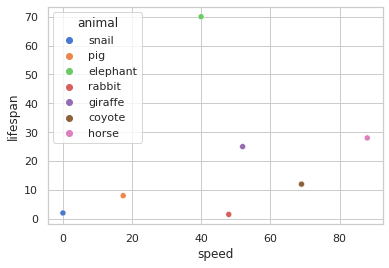

In [180]:
sns.scatterplot(x='speed', y='lifespan', data=df, hue='animal', 
                ec=None)

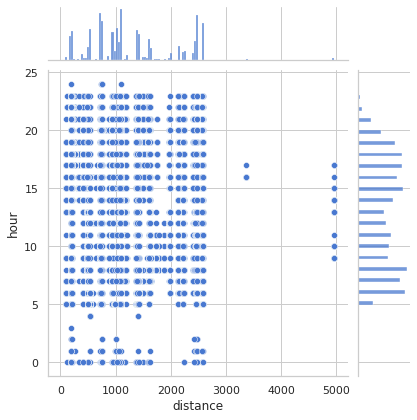

In [181]:
sns.jointplot(x='distance', y='hour', data=flights)

[17, 94, 96, 116, 184, 187, 199, 200, 212, 213, 214, 269, 292, 319, 335, 340, 404, 416, 419, 488, 502, 509, 529, 541, 544, 585, 628, 642, 645, 660, 719, 733, 740, 746, 760, 762, 765, 833, 872, 888, 892, 937, 944, 950, 963, 997, 1005, 1008, 1010, 1020, 1023, 1029, 1035, 1047, 1065, 1068, 1069, 1074, 1076, 1080, 1085, 1089, 1096, 1107, 1134, 1148, 1167, 1182, 1183, 1207, 1372, 1389, 1391, 1400, 1416, 1417, 1504, 1521, 1569, 1585, 1587, 1598, 1605, 1608, 1620, 1623, 1626, 1634, 1725, 1726, 1728, 1746, 1747, 1795, 1874, 1882, 1894, 1969, 1990, 2133, 2153, 2227, 2248, 2402, 2422, 2425, 2434, 2446, 2454, 2475, 2565, 2586, 3370, 4963]
[nan, nan, nan, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

/tmp/ipykernel_183/3930485076.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(list(flights.distance), list(flights.hour), bins=100, cmap = "RdYlGn_r",


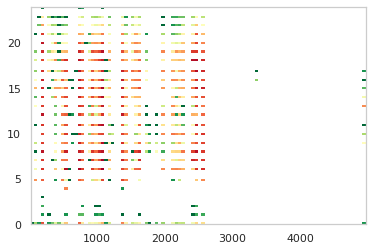

In [182]:
print(sorted(set(flights.distance)))
print(sorted(set(flights.hour))[:100])

flights['hour'].fillna(0, inplace=True);

from matplotlib import colors
plt.hist2d(list(flights.distance), list(flights.hour), bins=100, cmap = "RdYlGn_r",
           norm = colors.LogNorm());

/tmp/ipykernel_183/570105083.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  multivariate_normal([30, 20],
/tmp/ipykernel_183/570105083.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(result[:, 0],


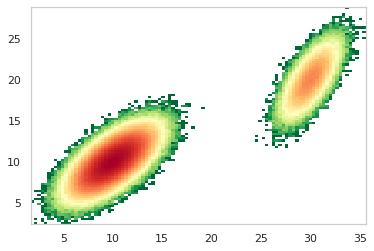

In [183]:
from matplotlib import colors
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
  
    
result = np.vstack([
    multivariate_normal([10, 10],
            [[3, 2], [2, 3]], size=1000000),
    multivariate_normal([30, 20],
            [[2, 3], [1, 3]], size=100000)
])
  
plt.hist2d(result[:, 0], 
           result[:, 1],
           bins = 100, 
           cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.show()

## Pair plot

In [5]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
display(data1)
print(set(data1.target))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


{0.0, 1.0, 2.0}


In [7]:
help(iris)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 

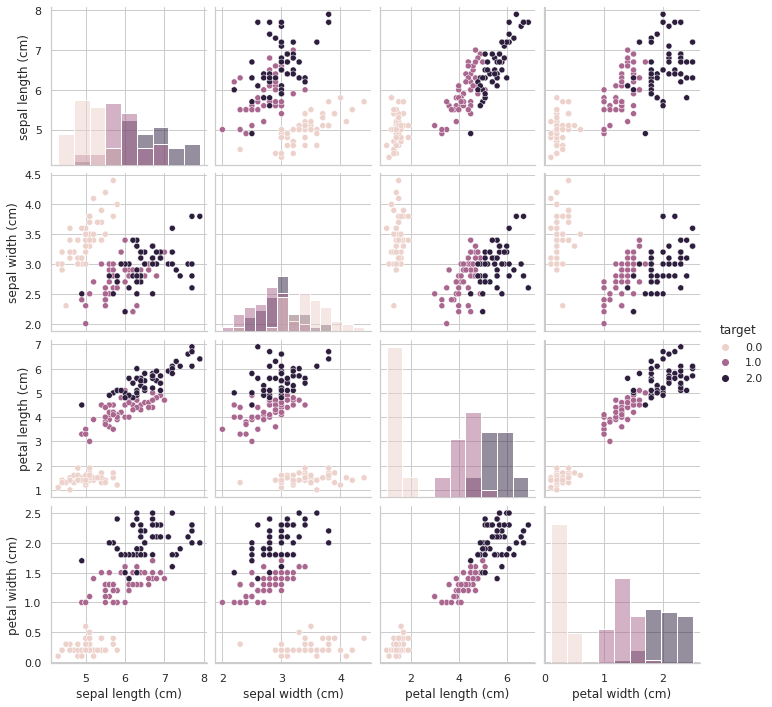

In [185]:
import seaborn as sns

sns.pairplot(data1, hue="target", diag_kind="hist")

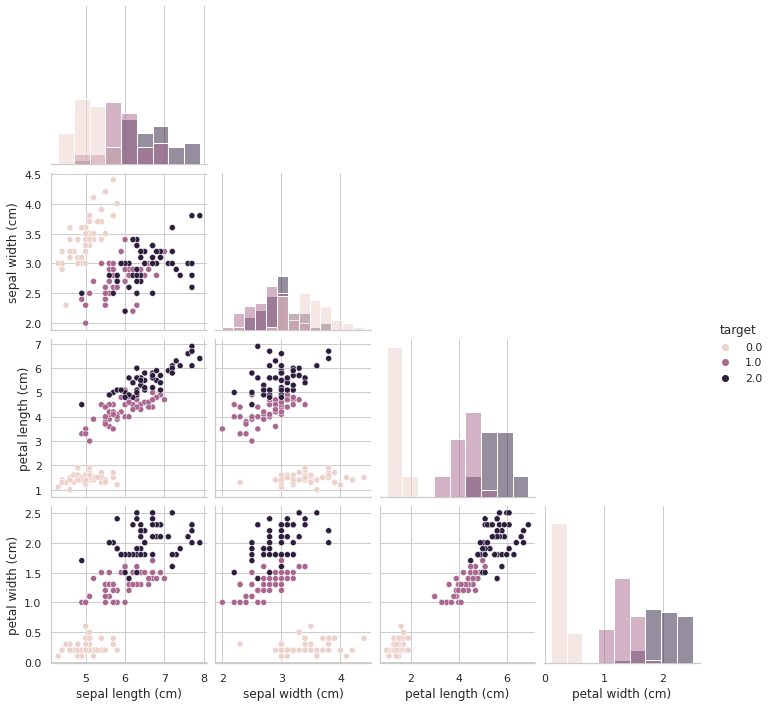

In [186]:
sns.pairplot(data1, hue="target", diag_kind="hist", corner=True)

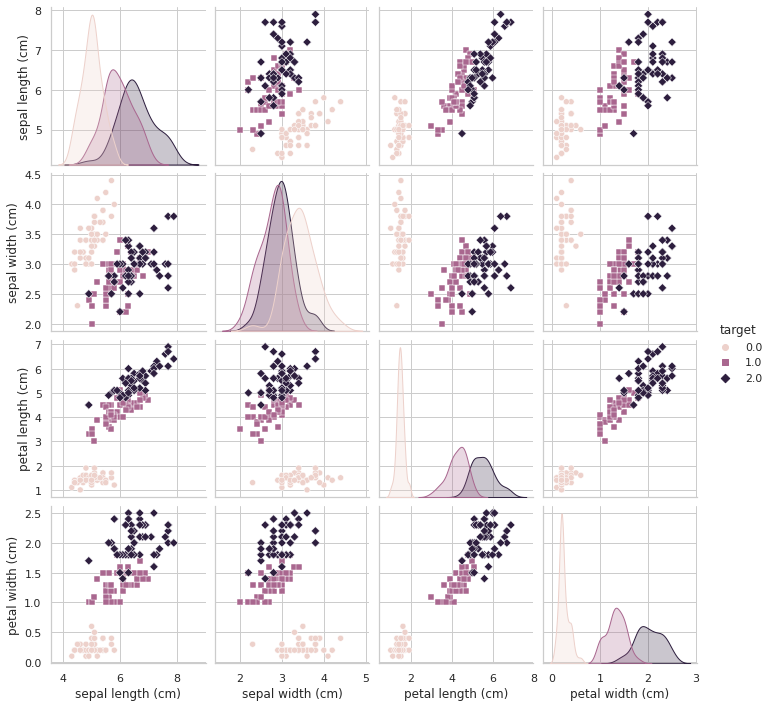

In [187]:
sns.pairplot(data1, hue="target", markers=["o", "s", "D"])

## Box plot

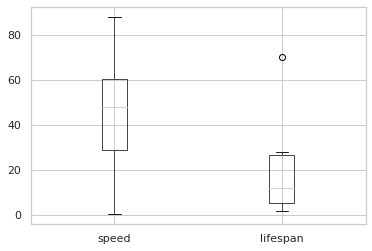

In [188]:
df.boxplot();

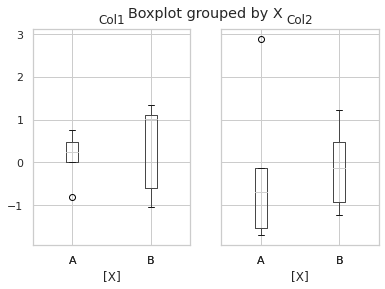

In [189]:
np.random.seed(12)
dft = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])
dft['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])
boxplot = dft.boxplot(by='X')

In [190]:
print(dft[ dft.X=='A' ]['Col1'])

0    0.472986
1    0.242439
2    0.753143
3    0.005127
4   -0.806982
Name: Col1, dtype: float64


In [191]:
print(dft[ dft.X=='A' ]['Col2'])

0   -0.681426
1   -1.700736
2   -1.534721
3   -0.120228
4    2.871819
Name: Col2, dtype: float64



<div><img src="2-imgs/pyl6.png" style="width: 400px;"/></div> 

IQR = **interquantile range** è un indice di dispersione e ci informa quanto i valori della distribuzione si allontanano dal valore centrale. Nel caso specifico di IQR, l'informazione di dispersione riguarda il 50% dei dati più vicini alla media. 

<div><img src="2-imgs/pyl7.jpg" style="width: 200px;"/></div> 

<AxesSubplot:title={'center':'distance'}, xlabel='carrier'>

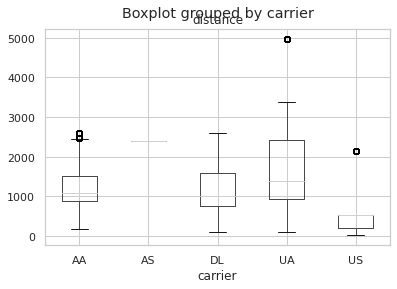

In [192]:
flights.boxplot(column='distance', by='carrier')

 ## Violin plot

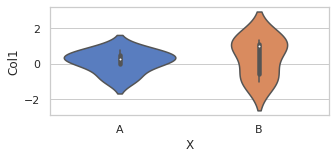

In [193]:
fig, axes = plt.subplots(figsize=(5,2))
sns.violinplot(x='X',y='Col1', data=dft, ax = axes)
axes.yaxis.grid(True)

<AxesSubplot:title={'center':'Col1'}, xlabel='X'>

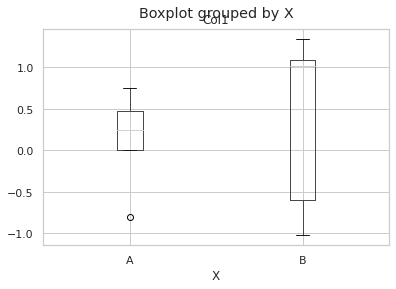

In [194]:
dft.boxplot(column='Col1', by='X')

<AxesSubplot:xlabel='X', ylabel='Col1'>

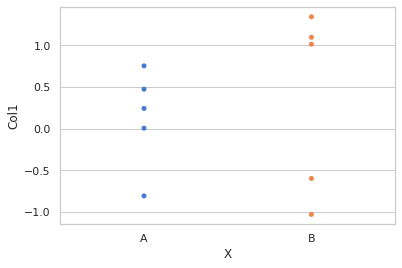

In [195]:
sns.swarmplot(x='X',y='Col1', data=dft)

<AxesSubplot:xlabel='rank', ylabel='service'>

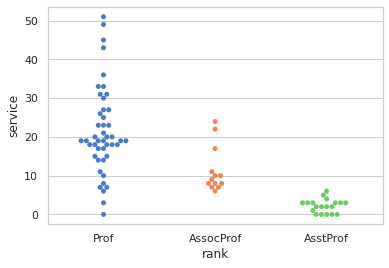

In [196]:
salaries = pd.read_csv("Salaries.csv")

sns.swarmplot(x='rank',y='service', data=salaries)


**Attenzione**: ogni violino è indipendente dall'altro. In particolare le larghezze non sono assolute ma relative ad ogni violino.

<AxesSubplot:xlabel='rank', ylabel='service'>

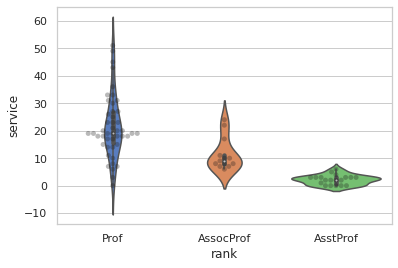

In [197]:
sns.violinplot(x='rank',y='service', data=salaries)
sns.swarmplot(x='rank',y='service', data=salaries, color='k', alpha=0.3)

In [198]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [199]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")
display(iris)

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


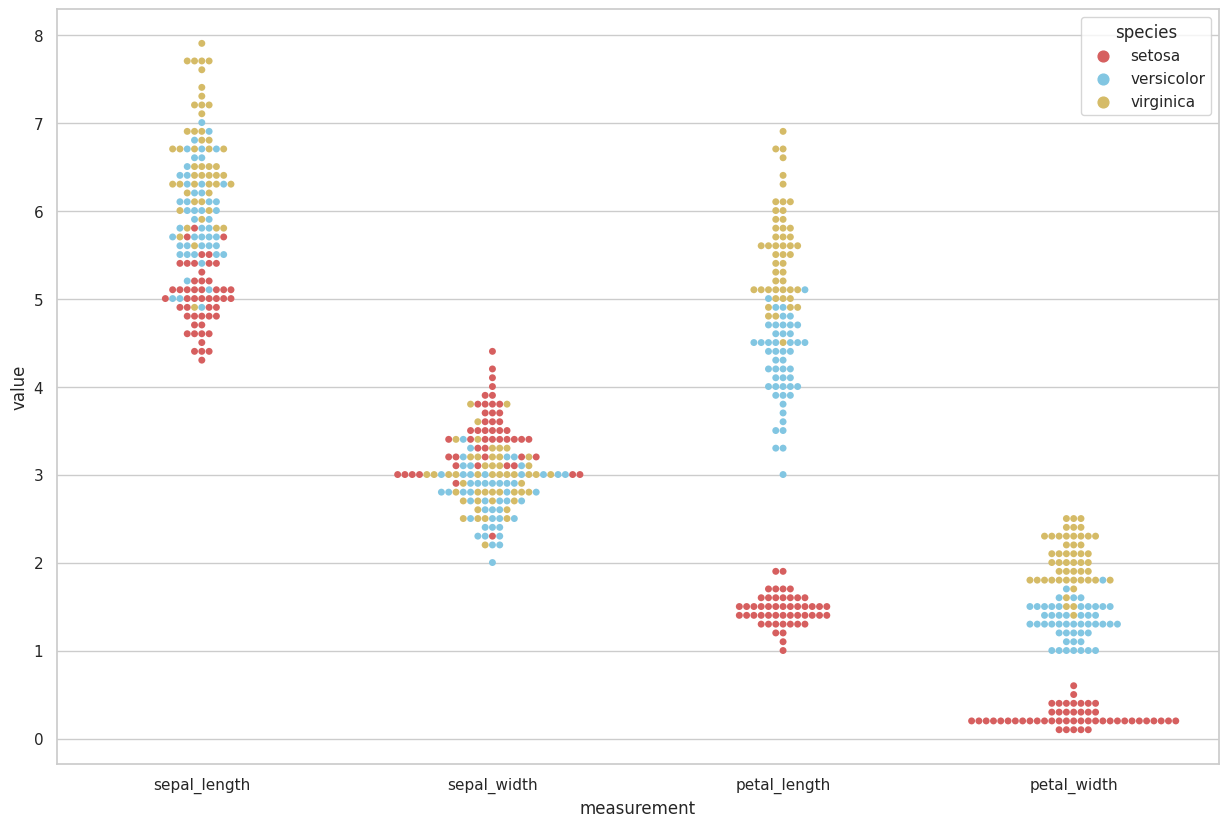

In [200]:
fig, ax = plt.subplots( figsize=(15,10), dpi=100)

sns.swarmplot(x="measurement", y="value", hue="species", 
              palette=["r", "c", "y"], data=iris, axes=ax);